fbdb

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import laplace
from PIL import Image

import itertools

import os

### Image types

In [2]:
df = pd.read_csv('data/private_info/train.csv', sep = '\t')
print(df.shape[0])
df.head()

5277


,image_name,label_id
0,good_cigs_000403.jpg,1
1,sigars_000289.jpg,1
2,sigars_000276.jpg,1
3,sigars_000262.jpg,1
4,sigars_000048.jpg,1


label_id
0    3363
1    1914
Name: count, dtype: int64


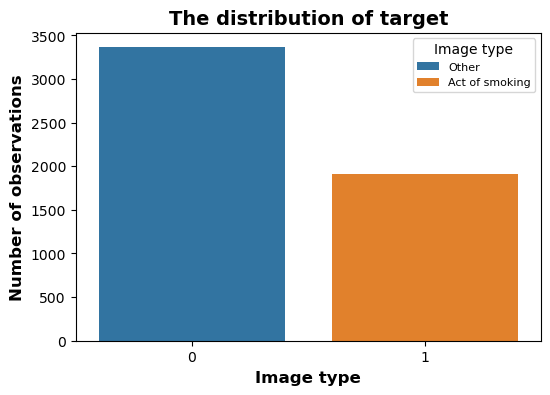

In [3]:
print(df['label_id'].value_counts() )

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('The distribution of target', fontsize=14,fontweight="bold")

plt.xlabel('Image type',  fontsize=12, fontweight="bold")
plt.ylabel('Number of observations',  fontsize=12, fontweight="bold")
sns.countplot( data = df, x = 'label_id' ,ax = ax, hue = 'label_id');
plt.legend(title='Image type', labels=[ 'Other', 'Act of smoking'], title_fontsize=10, fontsize=8
         );

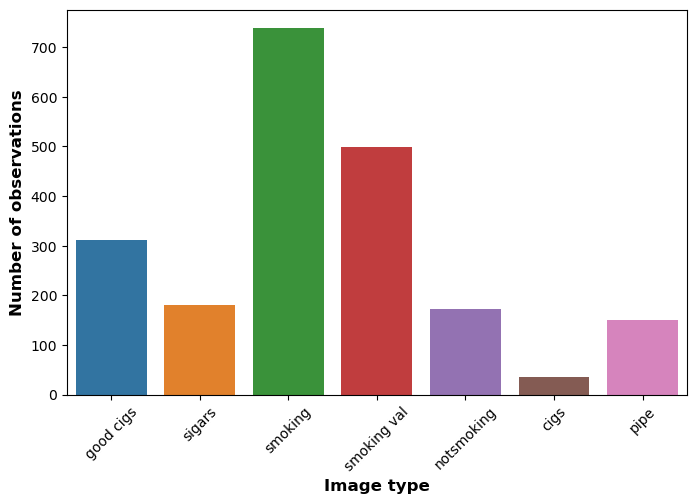

In [4]:
df['image_type'] = df['image_name'].str.split(r"(_\d+)", regex = True).str[0]
df['image_type'] = df['image_type'].str.replace('_', ' ')
df['image_type'] = np.where(df['image_type'].str.contains(r'(\d+)'), 'others', df['image_type'] )

dff = df[~df.image_type.isin(['others', 'default railway.jpg']) ]
fig, ax = plt.subplots(figsize=(8, 5))


plt.xlabel('Image type',  fontsize=12, fontweight="bold")
plt.ylabel('Number of observations',  fontsize=12, fontweight="bold")
sns.countplot( data = dff, x = 'image_type' ,ax = ax, hue = 'image_type');
plt.xticks(rotation=45);


### Images features

In [5]:
i = cv2.imread("data/train/cigs/" + os.listdir('data/train/cigs')[0]  )

In [3]:
type(i)

numpy.ndarray

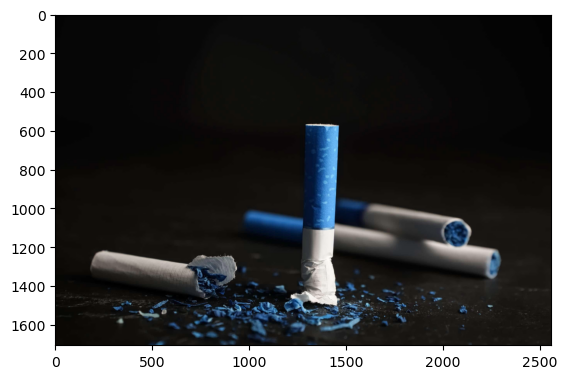

In [6]:
plt.imshow(i)
plt.show()

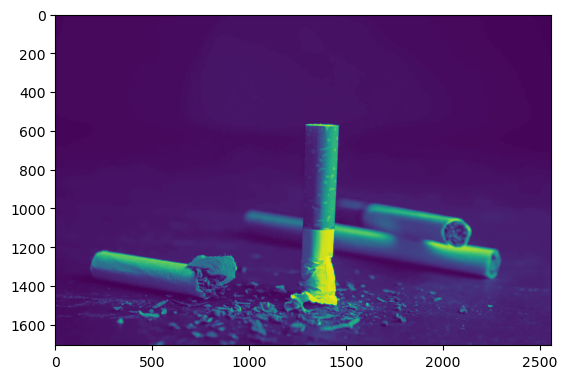

In [83]:
plt.imshow(g)
plt.show()

In [84]:
final_df['rgb'].apply(pd.Series)

,R,G,B
0,[23.644596010910956],[24.670447285076158],[25.445755986379613]
1,[230.72189155555554],[235.13174755555556],[237.25554133333333]
2,[128.6959377424033],[129.85865569458028],[134.10569626656775]
3,[129.37797817167242],[131.3178452322337],[123.2105086164451]
4,[120.1597951388889],[125.66986180555556],[133.5322451388889]
...,...,...,...
758,[51.5646240234375],[56.781123046875],[56.81056396484375]
759,[78.77927978515625],[81.38185546875],[90.02269287109375]
760,[29.24350830078125],[35.84337158203125],[43.9588720703125]
761,[33.18475341796875],[30.9799609375],[29.0784423828125]


In [34]:
calculate_color_distribution(i)

{'R': [23.644596010910956],
 'G': [24.670447285076158],
 'B': [25.445755986379613]}

In [6]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

def brightness(image):
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    return np.array(image).mean()

def calculate_contrast(image):
     image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
     return np.array(image).std()

def calculate_color_distribution(image):
    color_distribution = {'R': [], 'G': [], 'B': []}
    
    color_distribution['R'].append(np.mean(image[:,:,0]))
    color_distribution['G'].append(np.mean(image[:,:,1]))
    color_distribution['B'].append(np.mean(image[:,:,2]))
    return color_distribution

In [9]:
calculate_color_distribution(i)['R'][0]

23.644596010910956

In [24]:
brightness(i)

24.449738486448265

In [17]:





def load_images(folder:str ):
    path = 'data/train/' + folder
    img_names_list = os.listdir(path)
    sharpness_list = []
    contrast_list = []
    bright_list = []
    rgb_r = []
    rgb_g = []
    rgb_b = []
    folders = []
    for i in img_names_list:
        path_img = 'data/train/' + folder + '/'+ i 
        img = cv2.imread(path_img)
        sharpness_list.append(variance_of_laplacian(img ) )
        contrast_list.append(calculate_contrast(img))
        bright_list.append(brightness(img))
        rgb_r.append(calculate_color_distribution(img)['R'][0])
        rgb_g.append(calculate_color_distribution(img)['G'][0])
        rgb_b.append(calculate_color_distribution(img)['B'][0])

        
        del img
        folders.append(folder)
    df = {'image_id':  img_names_list,'category': folder, 'sharpness' : sharpness_list, 
          'contrast' : contrast_list, 'bright' : bright_list, 
          'rgb_red' : rgb_r,
          'rgb_green': rgb_g,
          'rgb_blue' : rgb_b
          }

    return pd.DataFrame(df)
        




In [18]:
%%time

categories = os.listdir('train/')
final_df = pd.DataFrame()
for category in categories:
    df  =  load_images(category)
    final_df = pd.concat([final_df, df])

CPU times: total: 8min 41s
Wall time: 8min 49s


In [36]:
final_df.to_excel("images_features.xlsx")

In [20]:
final_df.head()

,image_id,category,sharpness,contrast,bright,rgb_red,rgb_green,rgb_blue
0,cigs_1_000037.jpg,cigs,20.119542,36.140045,24.449738,23.644596,24.670447,25.445756
1,cigs_1_000040.jpg,cigs,167.245179,58.429170,234.032241,230.721892,235.131748,237.255541
2,cigs_1_000045.jpg,cigs,789.133910,53.230679,129.982296,128.695938,129.858656,134.105696
3,cigs_1_000048.jpg,cigs,122.197717,68.937343,129.800651,129.377978,131.317845,123.210509
4,cigs_1_000050.jpg,cigs,8.433766,89.403778,124.906648,120.159795,125.669862,133.532245


In [29]:
final_df.describe()

,sharpness,contrast,bright,rgb_red,rgb_green,rgb_blue
count,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000
mean,722.571219,62.220777,160.013553,155.848550,160.665850,167.715503
std,1204.289396,20.474112,62.207317,64.531414,62.491656,61.303163
min,1.367567,5.458423,4.951322,3.878354,4.588537,6.524319
25%,142.754245,48.022276,109.333552,101.463628,110.647860,118.868630
50%,351.763787,62.291253,170.107529,167.045668,171.478171,181.018956
75%,805.547230,76.395107,214.937791,213.253421,215.562616,221.282108
max,17182.219874,118.013656,253.891688,254.242033,253.946959,254.738736


In [34]:
final_df.groupby('category').describe().T

category                 cigs         other         pipes     roll_cigs  \
sharpness count    209.000000   2115.000000     93.000000    122.000000   
          mean     784.533865    744.779090   1008.269423   1073.072167   
          std     1479.570230   1222.922285   1980.266471   1541.325954   
          min        4.239648      1.367567     38.674525      9.067994   
          25%      108.350757    127.821659    227.598074    248.407041   
          50%      294.783776    364.765669    501.709776    598.141783   
          75%      867.814108    860.755849    949.765513   1318.894636   
          max    14000.873291  17182.219874  15530.248852  11404.556263   
contrast  count    209.000000   2115.000000     93.000000    122.000000   
          mean      58.443727     60.997637     64.682488     60.348299   
          std       16.628052     21.767309     16.433485     16.569965   
          min       12.823702      5.458423     17.662897     29.000922   
          25%       48.107898     45.552196     54.990415     48.057901   
          50%       59.142058     60.579265     62.630813     57.765664   
          75%       69.467472     76.650277     76.956528     71.173289   
          max      109.237277    118.013656     95.898687    105.915629   
bright    count    209.000000   2115.000000     93.000000    122.000000   
          mean     141.712994    186.071898    173.972874    141.301761   
          std       63.440942     47.885831     59.913078     67.488614   
          min        9.758223     13.547980     16.679065     11.231748   
          25%       93.209672    156.824054    130.453311     78.969042   
          50%      139.312409    196.487624    192.841550    145.818163   
          75%      201.055566    224.009855    223.293758    204.316637   
          max      250.221409    253.891688    245.457782    243.513722   
rgb_red   count    209.000000   2115.000000     93.000000    122.000000   
          mean     137.693436    182.226918    168.821725    130.922668   
          std       64.917211     51.529890     63.605578     70.192251   
          min        9.324788      7.778747     13.783713      7.116324   
          25%       87.619019    152.685578    123.001604     64.306397   
          50%      131.550105    194.354930    188.955396    128.284634   
          75%      200.628573    222.828499    223.333140    199.101659   
          max      249.892730    254.242033    245.314247    242.168499   
rgb_green count    209.000000   2115.000000     93.000000    122.000000   
          mean     142.238735    186.856140    174.562124    143.161877   
          std       63.509567     47.972318     59.568007     67.576581   
          min        9.890896     10.570426     16.845405     12.368311   
          25%       94.306891    158.114139    130.141447     81.025385   
          50%      142.665719    197.913855    195.377906    150.182446   
          75%      201.342720    224.844268    224.616774    205.236022   
          max      250.313173    253.946959    245.488841    244.057525   
rgb_blue  count    209.000000   2115.000000     93.000000    122.000000   
          mean     149.669200    192.278223    184.597312    159.060993   
          std       64.174256     47.570633     54.357766     64.517844   
          min       10.220071      6.524319     23.428594     16.179650   
          25%      104.746130    166.439172    144.151524    106.895246   
          50%      151.870262    204.638500    201.142307    169.529038   
          75%      207.198126    229.205392    227.209576    216.820154   
          max      250.949045    254.738736    246.429342    247.377313   

category             smoking  
sharpness count   763.000000  
          mean    553.172935  
          std     790.381884  
          min       6.085482  
          25%     167.752269  
          50%     315.117100  
          75%     529.162941  
          max    6861.666355  
contrast  count   763.000000  
          mean

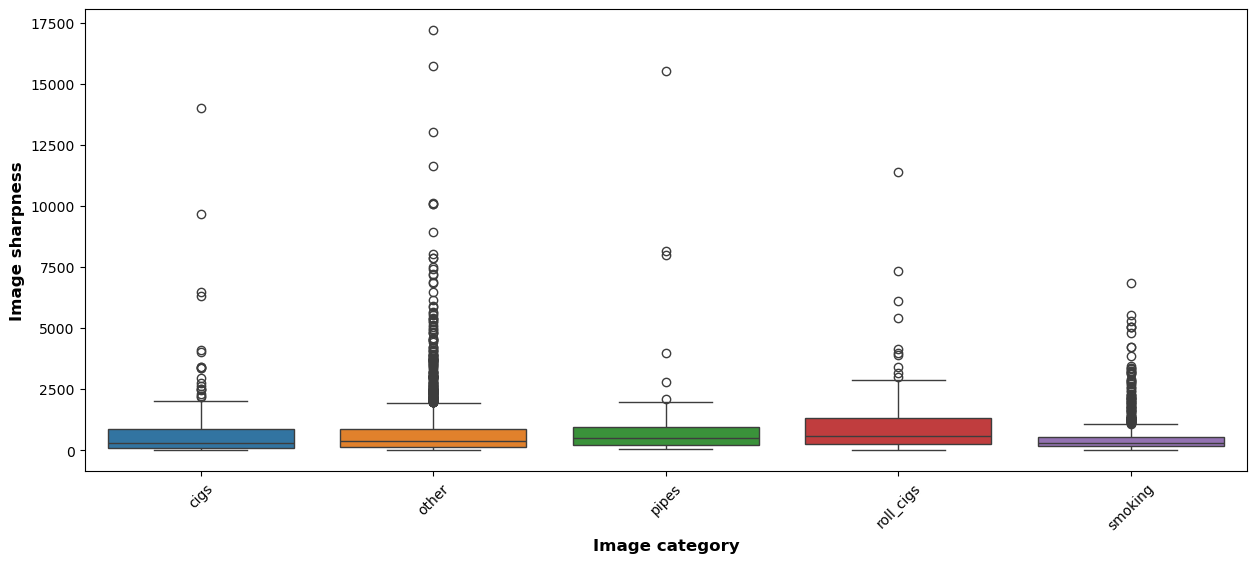

In [21]:
fig, ax = plt.subplots(figsize=(15, 6));
sns.boxplot(data = final_df, x = 'category', y = 'sharpness', hue = 'category',
              ax = ax
             );
plt.xticks(rotation=45);
plt.ylabel('Image sharpness',  fontsize=12, fontweight="bold");
plt.xlabel('Image category',  fontsize=12, fontweight="bold");

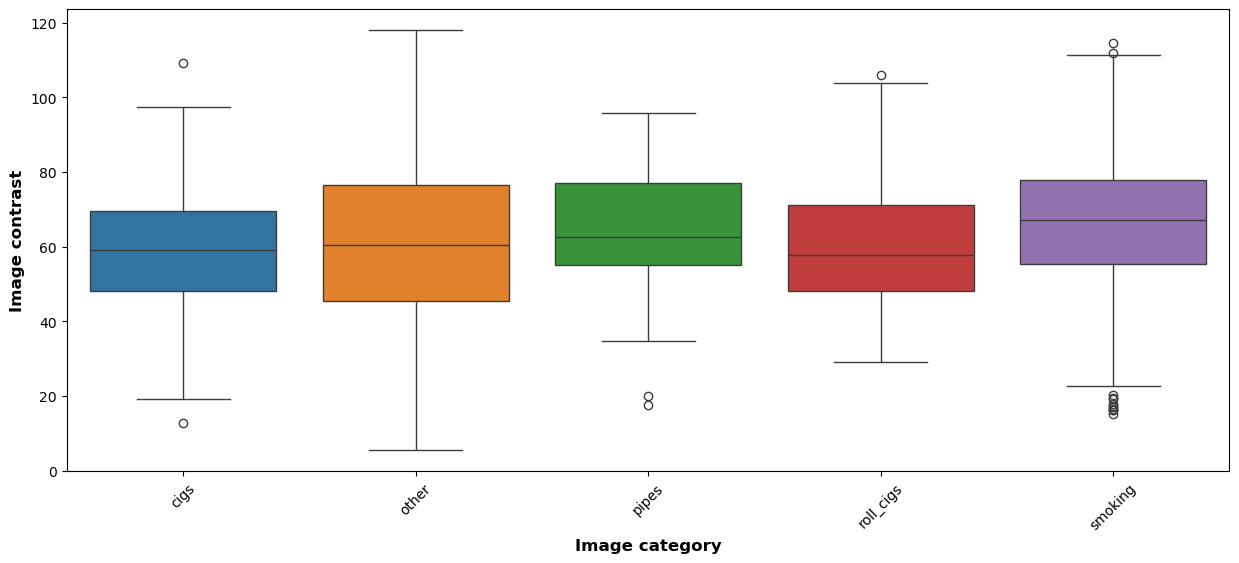

In [22]:
fig, ax = plt.subplots(figsize=(15, 6));
sns.boxplot(data = final_df, x = 'category', y = 'contrast', hue = 'category',
              ax = ax
             );
plt.xticks(rotation=45);
plt.ylabel('Image contrast',  fontsize=12, fontweight="bold");
plt.xlabel('Image category',  fontsize=12, fontweight="bold");

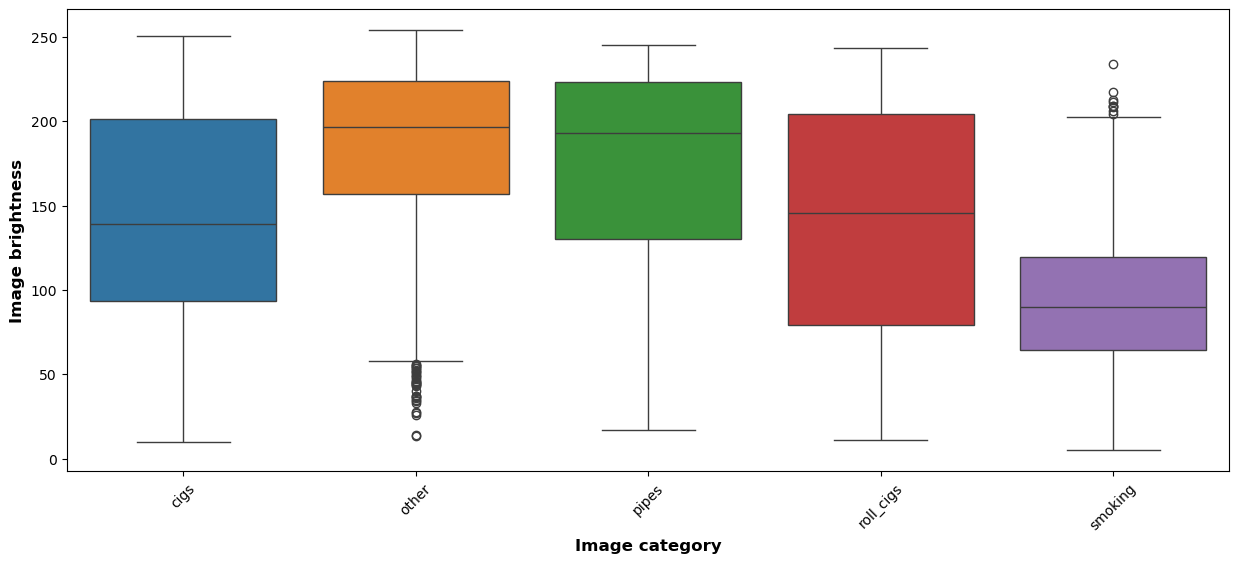

In [23]:
fig, ax = plt.subplots(figsize=(15, 6));
sns.boxplot(data = final_df, x = 'category', y = 'bright', hue = 'category',
              ax = ax
             );
plt.xticks(rotation=45);
plt.ylabel('Image brightness',  fontsize=12, fontweight="bold");
plt.xlabel('Image category',  fontsize=12, fontweight="bold");

In [27]:
final_df[['rgb_red', 'rgb_green', 'rgb_blue']].corr()

,rgb_red,rgb_green,rgb_blue
rgb_red,1.000000,0.966388,0.909299
rgb_green,0.966388,1.000000,0.956810
rgb_blue,0.909299,0.956810,1.000000


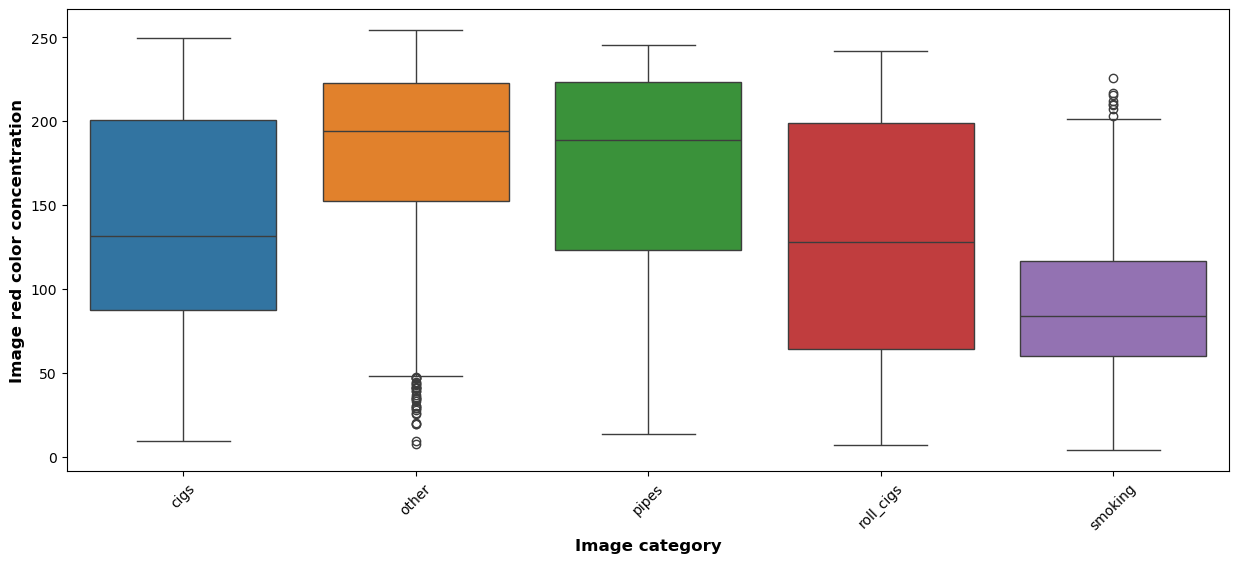

In [35]:
fig, ax = plt.subplots(figsize=(15, 6));
sns.boxplot(data = final_df, x = 'category', y = 'rgb_red', hue = 'category',
              ax = ax
             );
plt.xticks(rotation=45);
plt.ylabel('Image red color concentration',  fontsize=12, fontweight="bold");
plt.xlabel('Image category',  fontsize=12, fontweight="bold");